In [27]:
# 导入包或模块
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [28]:
# 定义参数
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2

# 生成标签
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)

# 构造线性回归方程，加上噪音
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), 
                       dtype=torch.float32)
print(features[0], labels[0])

tensor([-0.5433,  0.0303]) tensor(3.0166)


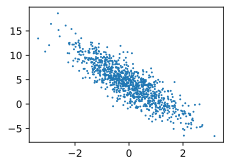

In [44]:
# 生成第二个特征features[:, 1]和标签 labels 的散点图
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import * 

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [30]:
# data_iter函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [31]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-2.1322, -1.0222],
        [ 0.4355, -2.0962],
        [ 1.2933, -1.2181],
        [-1.0933,  0.1477],
        [-1.2441,  1.6460],
        [-0.6259, -0.4680],
        [-1.5057,  0.0549],
        [-0.3392,  0.2232],
        [-0.1712, -1.1143],
        [-0.5157, -1.1150]]) tensor([ 3.4012, 12.2015, 10.9303,  1.5006, -3.8723,  4.5393,  1.0170,  2.7549,
         7.6369,  6.9700])


In [32]:
# 将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化成0
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [33]:
# linreg函数已保存在d2lzh_pytorch包中方便以后使用
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [34]:
# squared_loss损失函数定义
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return(y_hat - y.view(y_hat.size())) **2 / 2

In [35]:
# sgd函数已保存在d2lzh_pytorch包中方便以后使用
def sgd(params, lr, batch_size):
    for param in params:
        # 注意这里更改param时用的param.data
        # 这里自动求梯度模块计算得来的梯度是一个批量样本的梯度和，将它除以批量大小得到平均值
        param.data -= lr * param.grad / batch_size

In [37]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）
    # X和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
        
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_1 = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_1.mean().item()))

epoch 1, loss 0.033316
epoch 2, loss 0.000115
epoch 3, loss 0.000051


In [38]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9998],
        [-3.3998]], requires_grad=True)
4.2 
 tensor([4.1996], requires_grad=True)
